<a href="https://colab.research.google.com/github/sudeepmenon17/PytorchforNN/blob/main/Checking_beta_with_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!pip install google-auth
from google.colab import auth
from google.colab import drive

In [22]:
import tensorflow as tf
import numpy as np

In [23]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
# !ls /content/drive/MyDrive/

In [25]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/airfoil_model_tf_final')

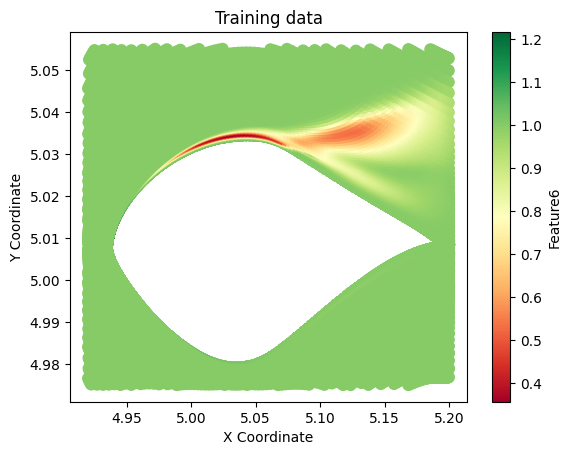

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

dff = pd.read_csv("/content/drive/MyDrive/data_set3.csv")

# dff.loc[dff['beta']<0.995, "beta"] = 1.5
# dff.loc[dff['beta']>1.005, "beta"] = 1.5


frames = [dff]
ff = []

for item in frames:
  xc = np.array(item['x'])
  yc = np.array(item['y'])
  b = np.array(item['beta'])
  ff1 = np.array(item['feature1'])
  ff2 = np.array(item['feature2'])
  ff3 = np.array(item['feature3'])
  ff4 = np.array(item['feature4'])
  ff5 = np.array(item['feature5'])
  ff6 = np.array(item['feature6'])

  # Normalize x and y coordinates
  min_range = -5.0
  max_range = 5.0
  xc = (xc - np.min(xc)) * (max_range - min_range) / (np.max(xc) - np.min(xc))
  yc = (yc - np.min(yc)) * (max_range - min_range) / (np.max(yc) - np.min(yc))


  x1,y1,b1,f1,f2,f3,f4,f5,f6 = [[] for i in range(9)]
  # Filter data for the specified range of coordinates
  for i in range(len(xc)):
    if xc[i]>=4.92 and xc[i]<=5.20:
      if yc[i]>=4.975 and yc[i]<=5.055:
        # if (b[i]<0.995) | (b[i]>1.005):
          x1.append(xc[i])
          y1.append(yc[i])
          b1.append(b[i])
          f1.append(ff1[i])
          f2.append(ff2[i])
          f3.append(ff3[i])
          f4.append(ff4[i])
          f5.append(ff5[i])
          f6.append(ff6[i])

  modified_data = {
  'x': np.array(x1),
  'y': np.array(y1),
  'beta': np.array(b1),
  'feature1': np.array(f1),
  'feature2': np.array(f2),
  'feature3': np.array(f3),
  'feature4': np.array(f4),
  'feature5': np.array(f5),
  'feature6': np.array(f6)
  }


  ff.append(pd.DataFrame(modified_data))

  # Create a scatter plot
  plt.scatter(x1, y1, c=b1,  cmap= 'RdYlGn',alpha=1, marker='.',s=250)
  plt.colorbar(label='Feature6')
  plt.xlabel('X Coordinate')
  plt.ylabel('Y Coordinate')
  plt.title('Training data')
  plt.show()
###############################################################################

dff1 = pd.concat(ff)

In [28]:
dff2 = dff1.drop(['x','y','beta'],axis=1)
X2 = dff2.values
X2 = np.array(X2,dtype=np.float32)
y2 = new_model.predict(X2)

1530/1530 [==============================] - 2s 1ms/step


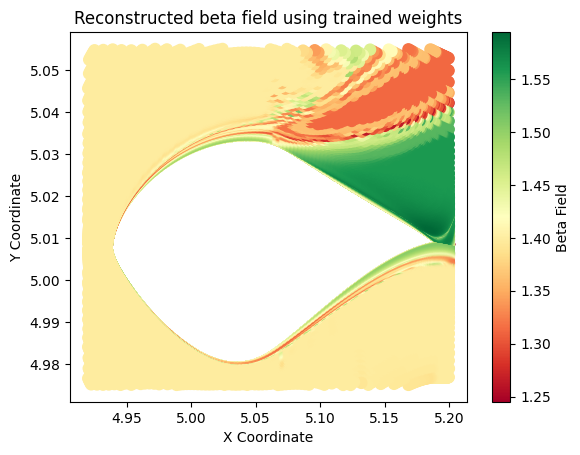

In [29]:
# Create a scatter plot
plt.scatter(x1, y1, c=y2,  cmap= 'RdYlGn',alpha=1, marker='.',s=250)
plt.colorbar(label='Beta Field')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Reconstructed beta field using trained weights')
plt.show()